In [ ]:
%pip install mesa

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

from model import CampusModel
from visualization import draw

In [2]:
G1 = nx.read_graphml("data/distances-graph.graphml")
G2 = nx.read_graphml("data/width-graph.graphml")

G = G1.copy()

In [3]:
tree = ET.parse("data/distances-graph.graphml")
root = tree.getroot()

ns = {
    "g": "http://graphml.graphdrawing.org/xmlns",
    "y": "http://www.yworks.com/xml/graphml"
}

nodeTypes = {'#FFCC00': 'building',
             '#33CCCC': 'court',
             '#808080': 'temporary-point',
             '#FF0000': 'restaurant',
             '#333333': 'parking',
             '#993366': 'entry/exit',
             '#FF00FF': 'outpatient',
             '#008000': 'bank',
             '#FFCC99': 'bathroom',
             '#008080': 'turnstile'}

nodeAdditionalInformation = {}

for node in root.findall(".//g:node", ns):
    nodeID = node.attrib['id']
    for data in node:
        for ShapeNode in data:
            for x in ShapeNode:
                if 'Fill' in str(x):
                    nodeColor = x.attrib['color']
                    nodeAdditionalInformation[nodeID] = nodeTypes[nodeColor]

for id, data in G.nodes(data=True):
    data['type'] = nodeAdditionalInformation[id]

In [4]:
for u, v, data in G.edges(data=True):
    data['distance'] = int(data['label'])
    data["width"] = int(G2.edges[u, v]['label'])

In [5]:
G = G.to_undirected()
restaurants = [id for id, data in G.nodes(data=True) if data["type"] in ('restaurant')]
bathrooms = [id for id, data in G.nodes(data=True) if data["type"] in ('bathroom')]

In [6]:
model = CampusModel(G, 1, restaurants, bathrooms)

deque([('class', 'n21', 7200), ('interval', 'n42', 900), ('class', 'n26', 7200), ('exit', 'n71', 1000)])
{'name': 'marketing', 'periods': {'morning': 160, 'afternoon': 0, 'evening': 120}, 'class_buildings': ['n20', 'n21', 'n26']} n71


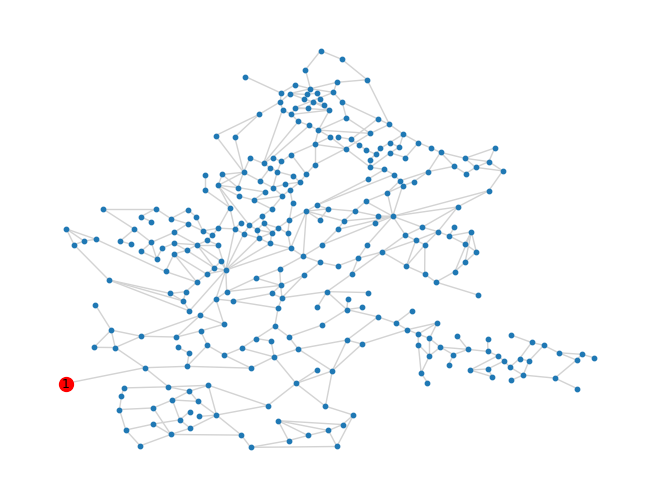


Tempo: 22



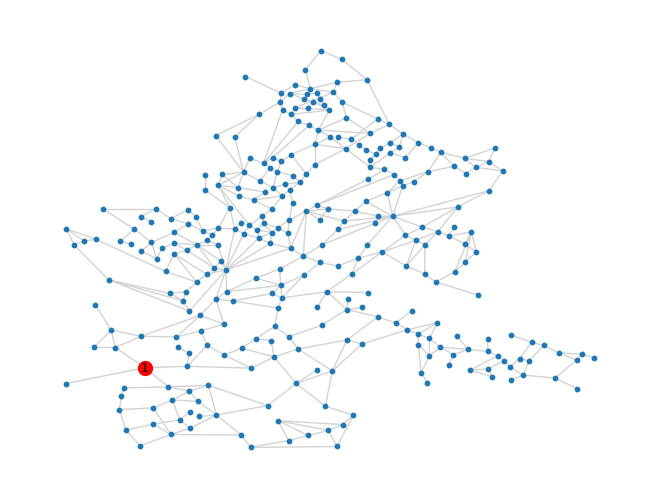


Tempo: 43



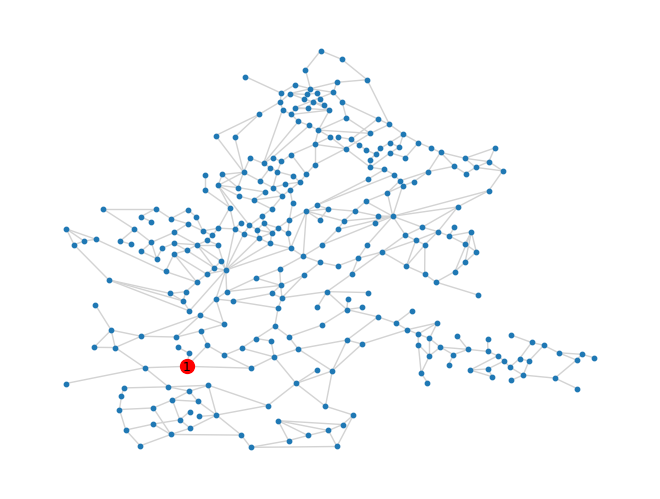


Tempo: 77



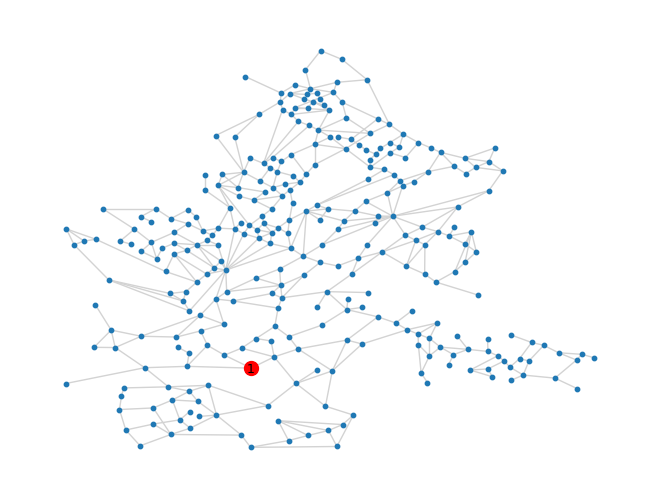


Tempo: 91



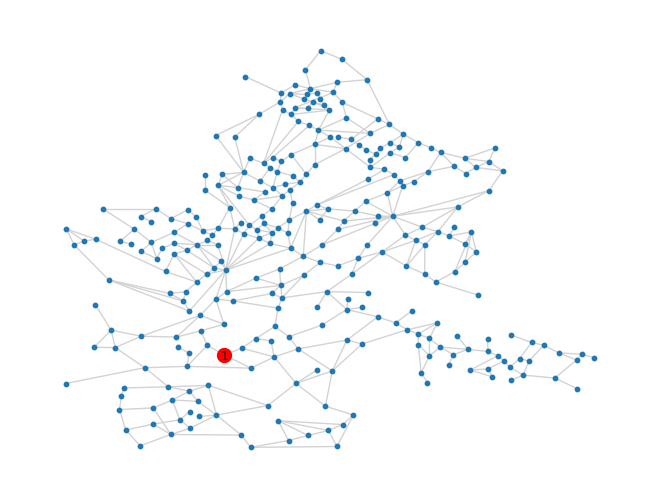


Tempo: 115



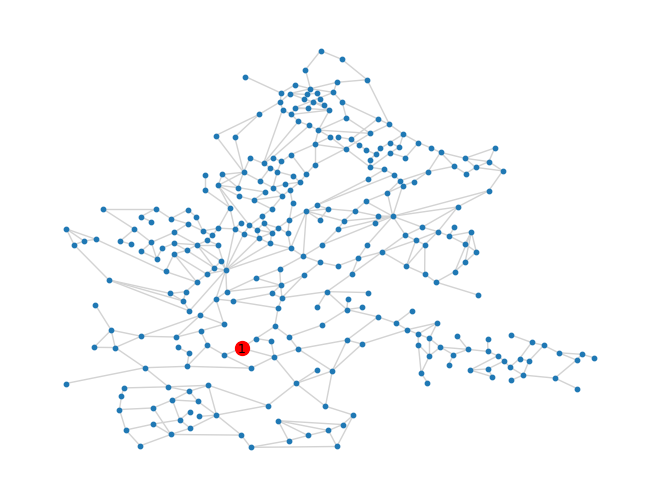


Tempo: 131



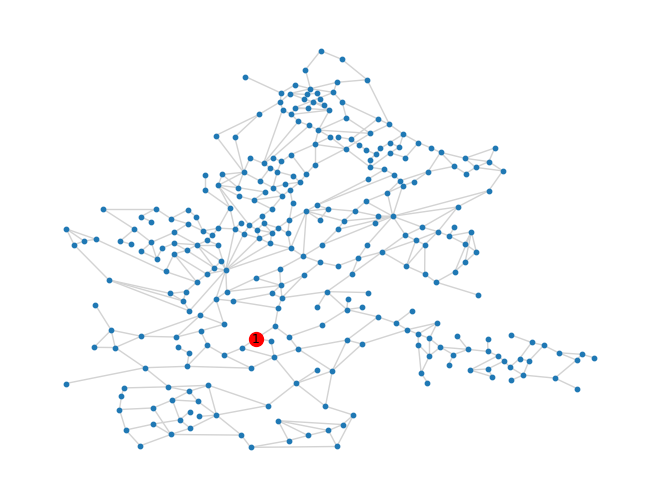


Tempo: 142



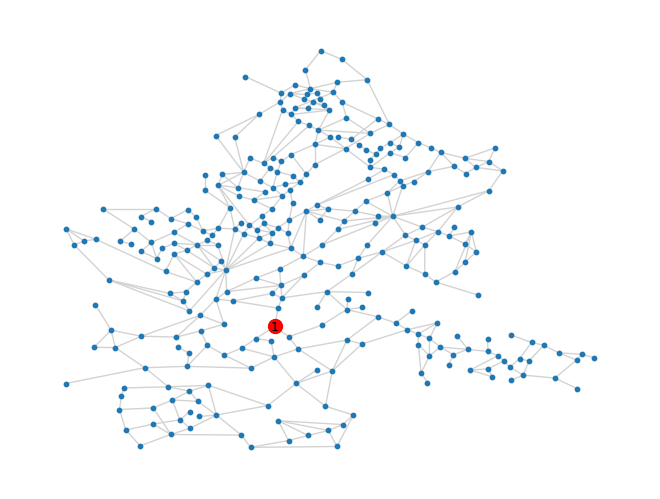


Tempo: 149



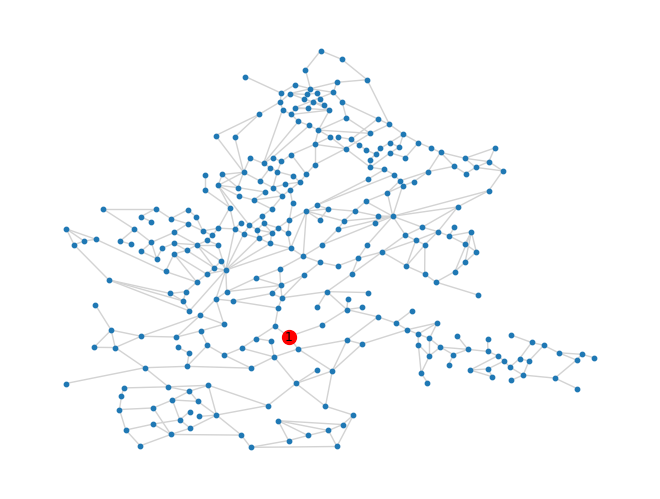


Tempo: 152



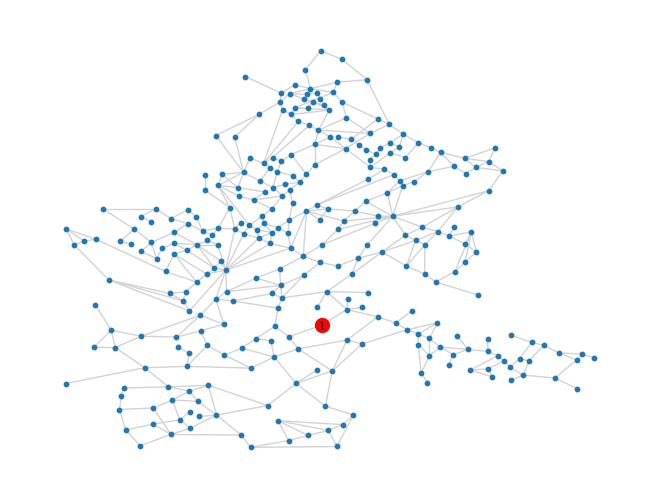


Tempo: 7362



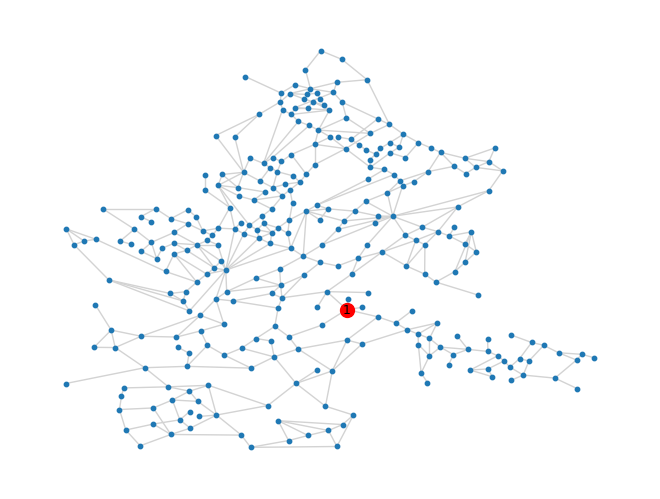

desviei
n41 n183

Tempo: 7368



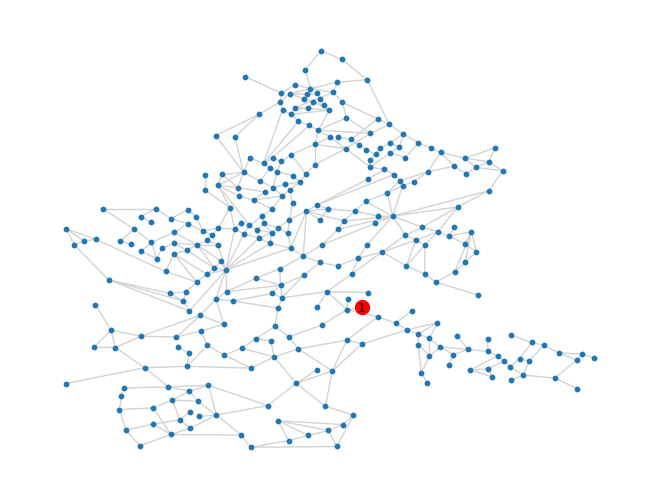


Tempo: 7374



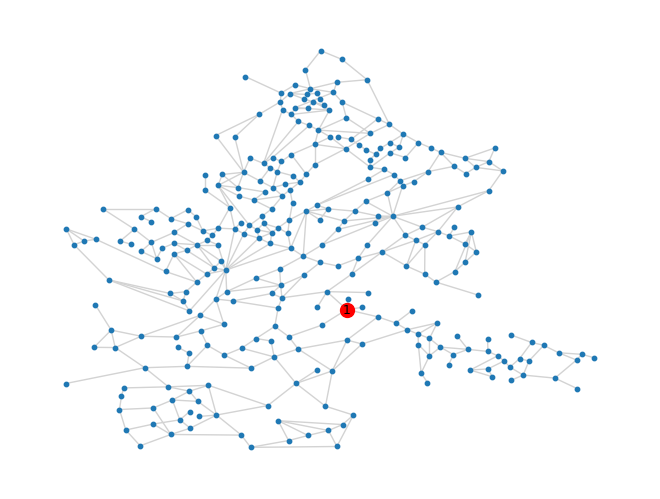


Tempo: 7415



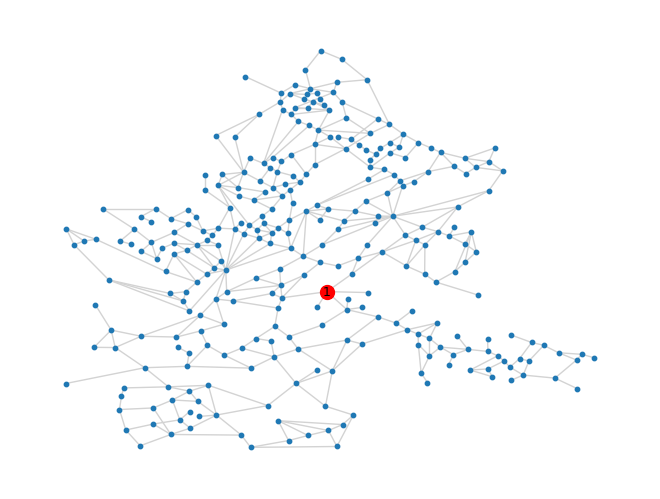


Tempo: 7429



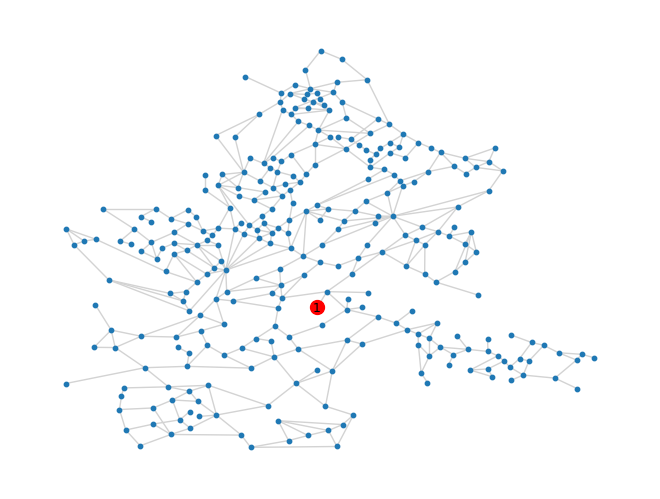


Tempo: 8344



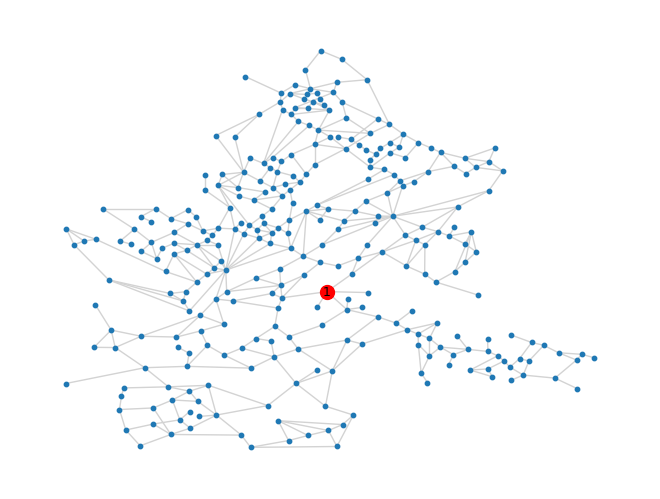

desviei
n40 n196

Tempo: 8390



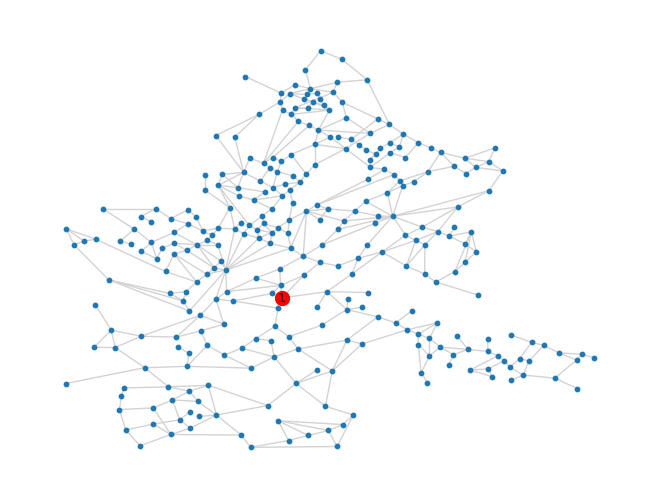


Tempo: 8398



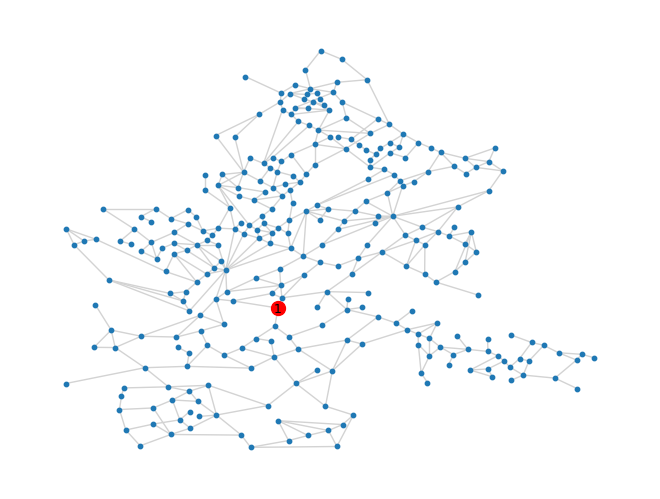


Tempo: 8407



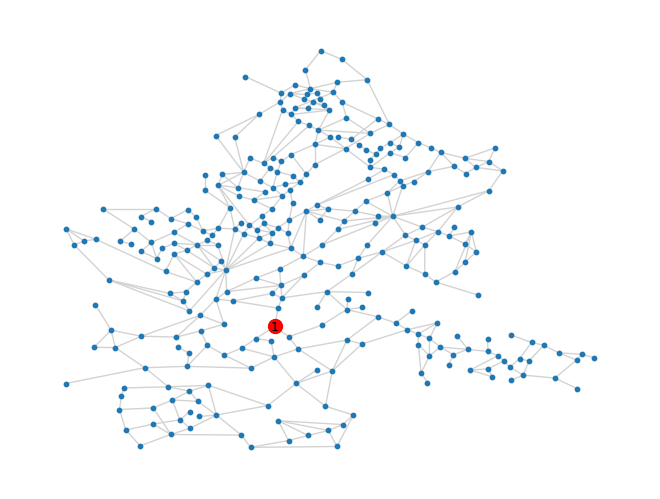


Tempo: 8414



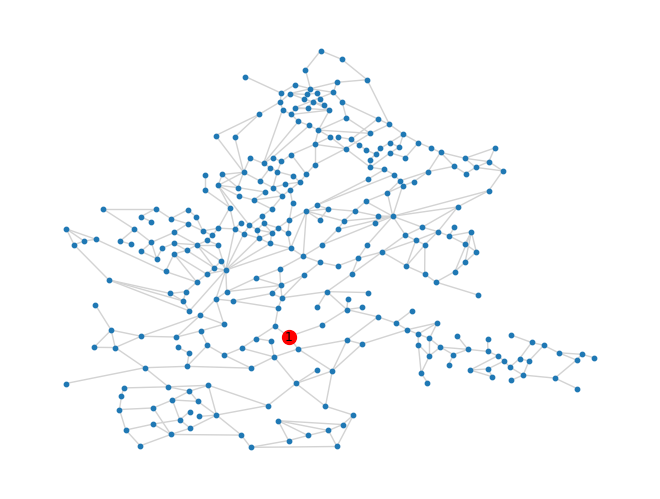


Tempo: 8445



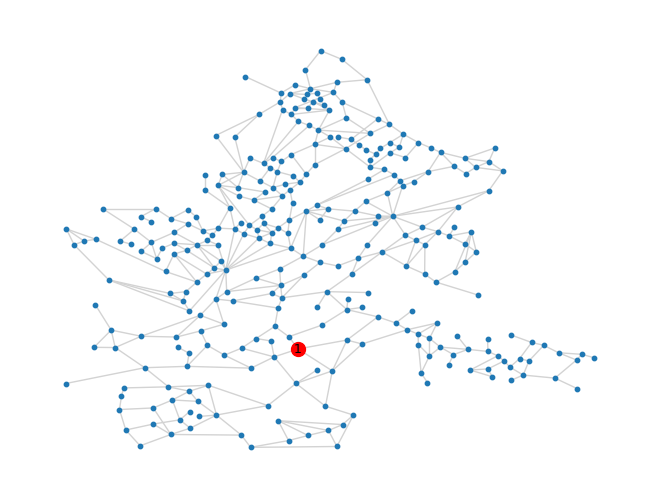


Tempo: 8465



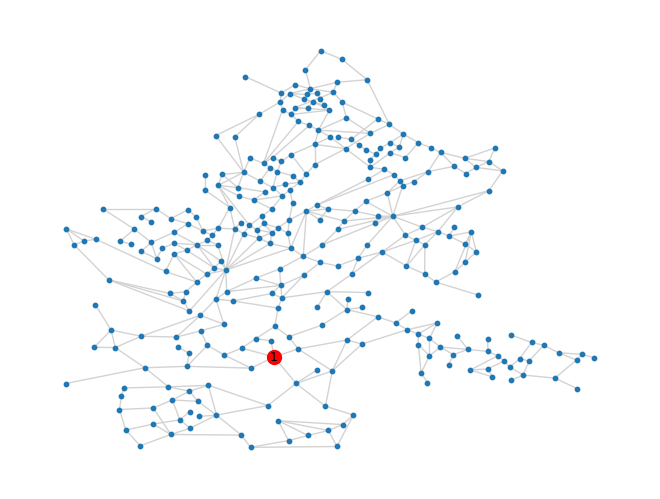


Tempo: 8494



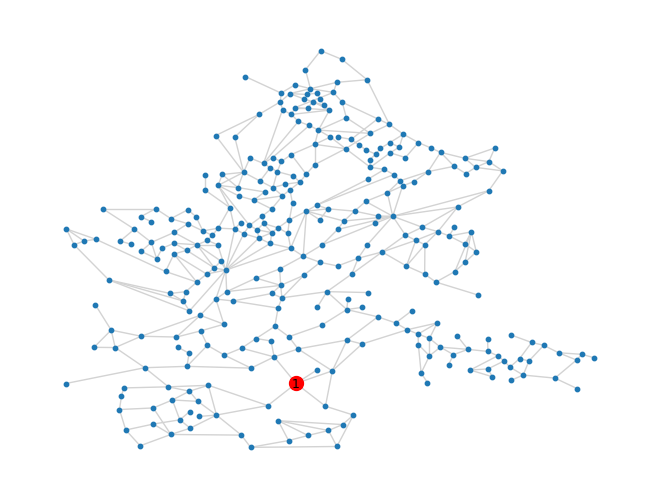


Tempo: 8523



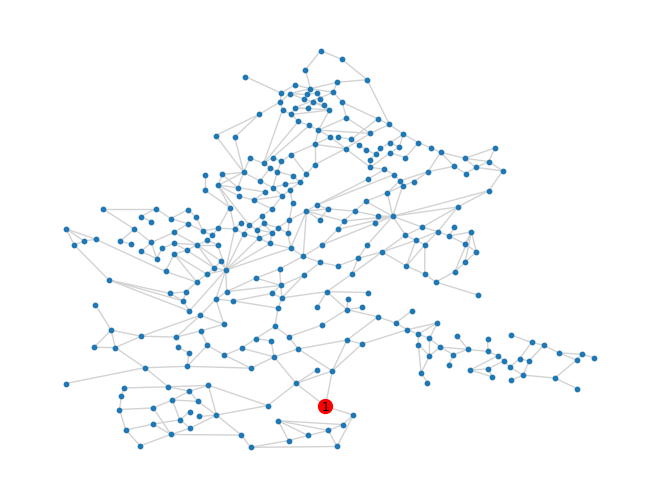


Tempo: 8552



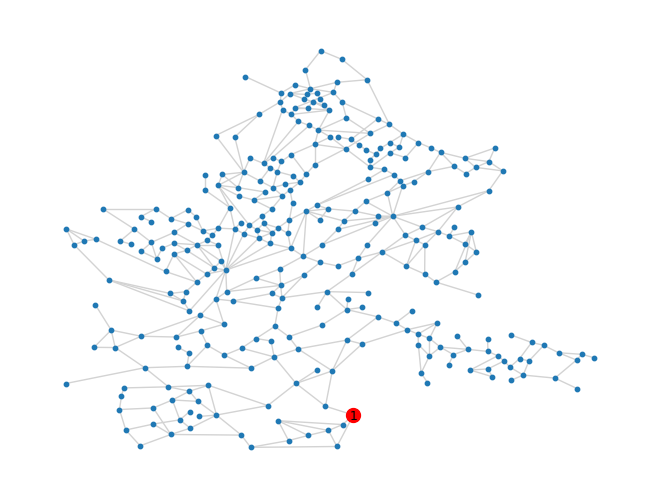


Tempo: 8574



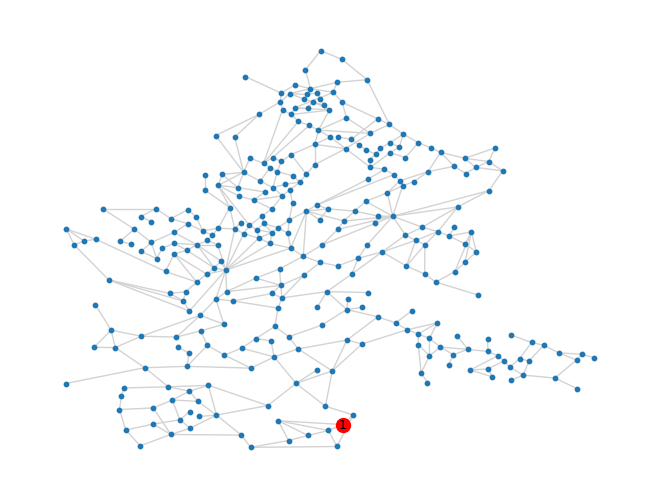


Tempo: 8577



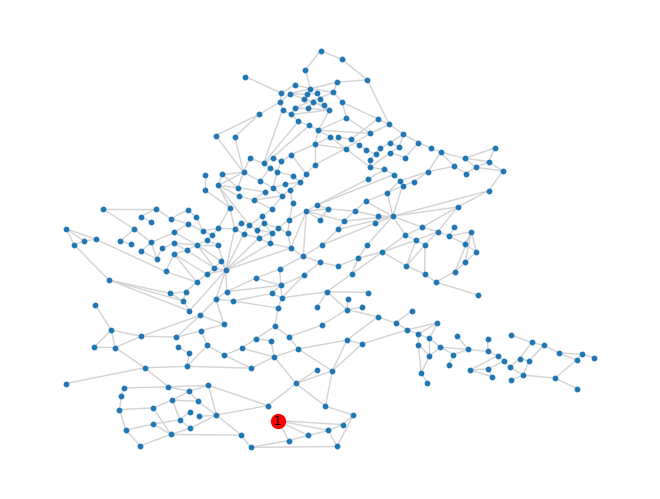


Tempo: 8580



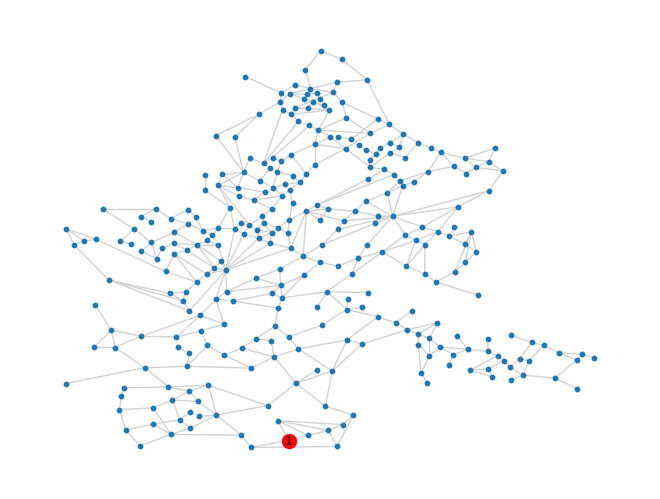


Tempo: 8607



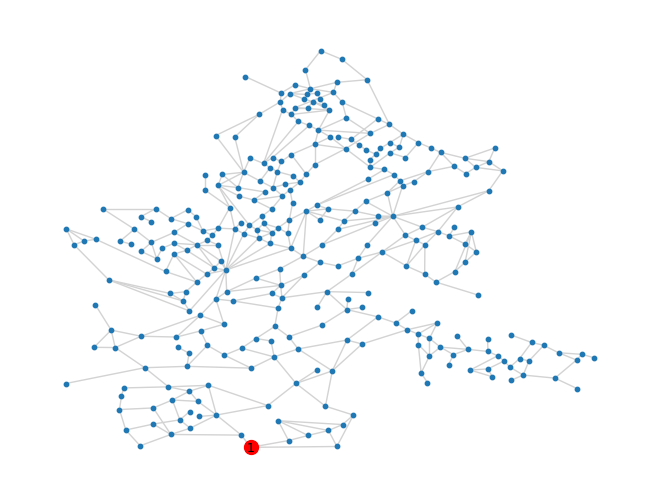


Tempo: 8612



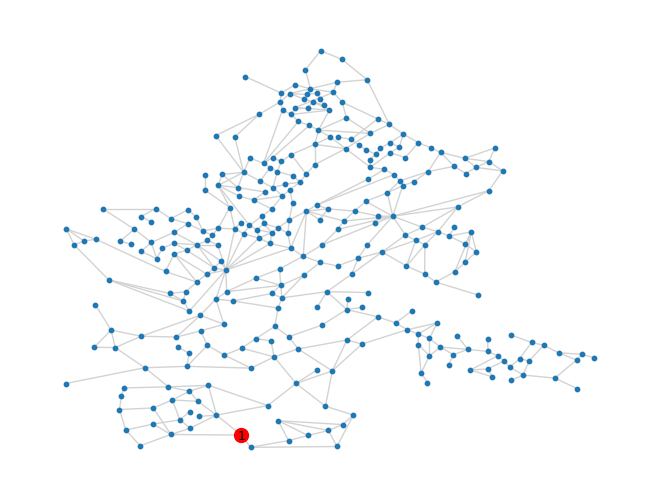


Tempo: 8625



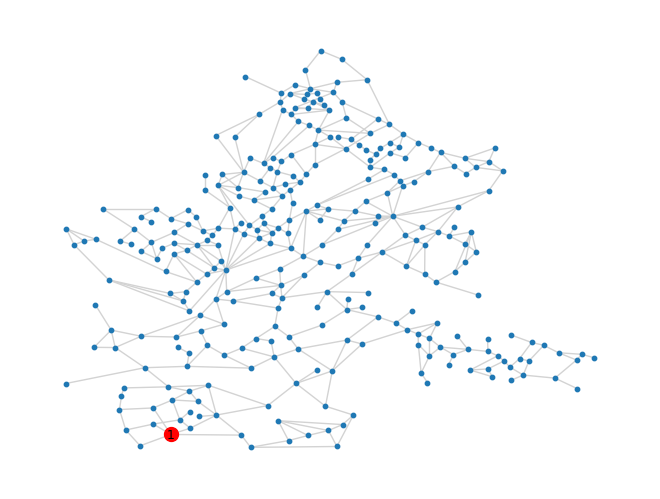


Tempo: 15830



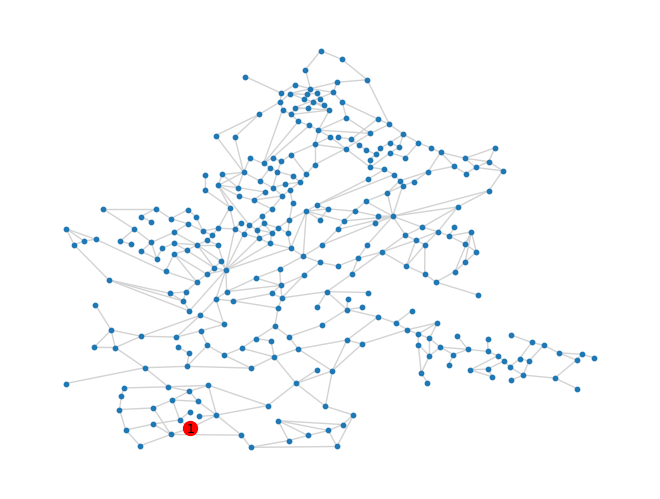


Tempo: 15852



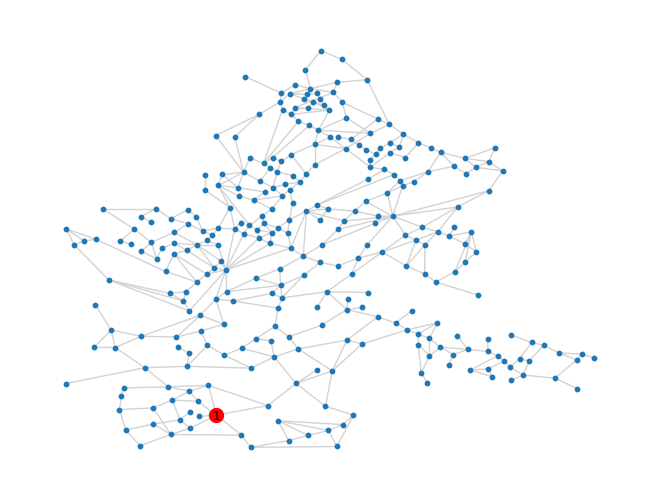


Tempo: 15874



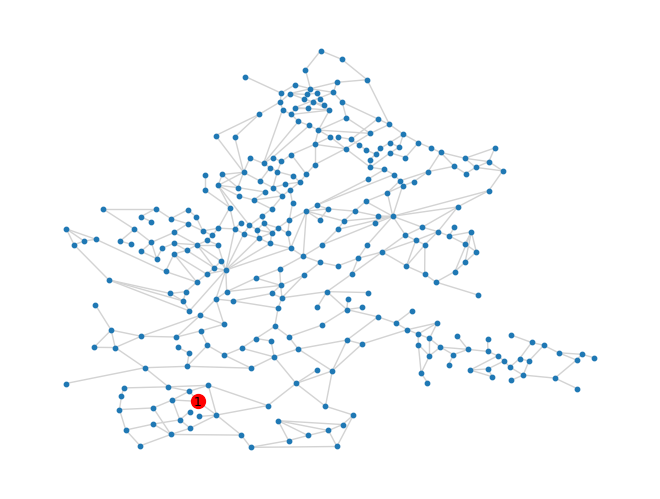


Tempo: 15906



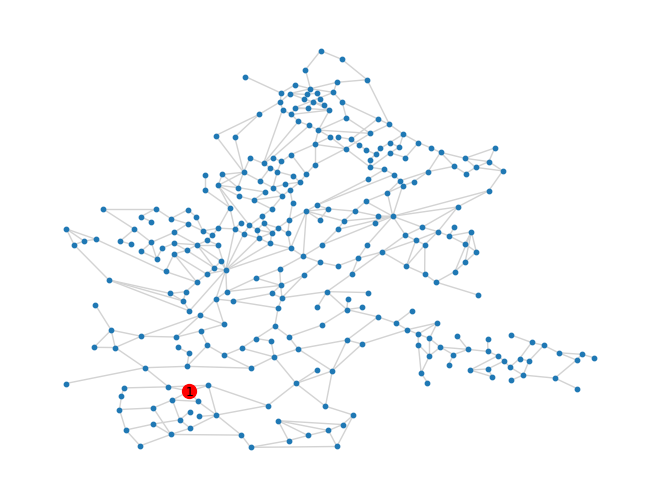


Tempo: 15920



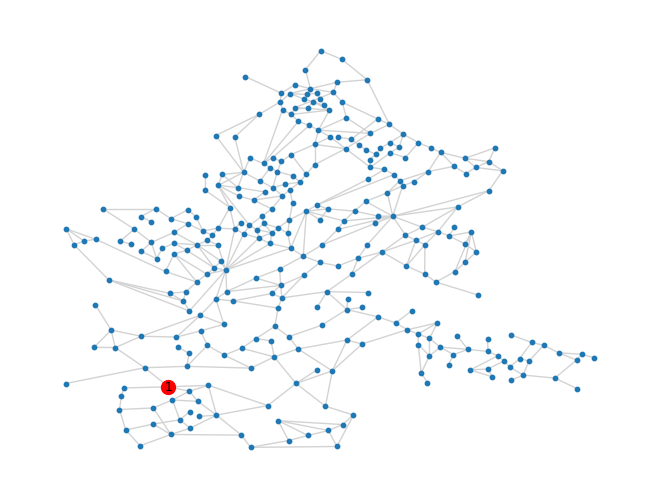


Tempo: 15941



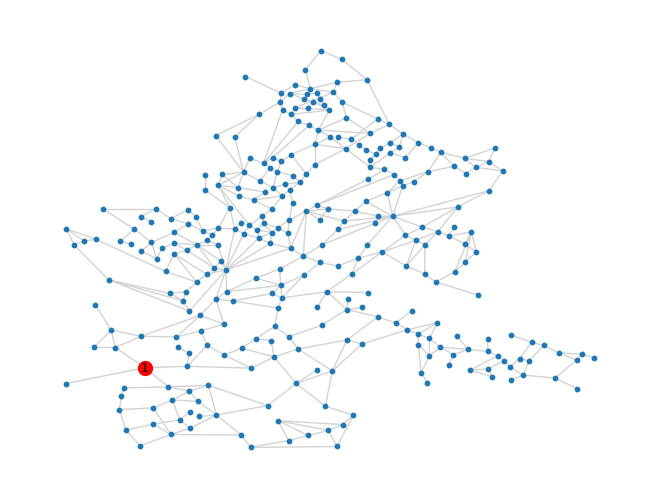


Tempo: 15964



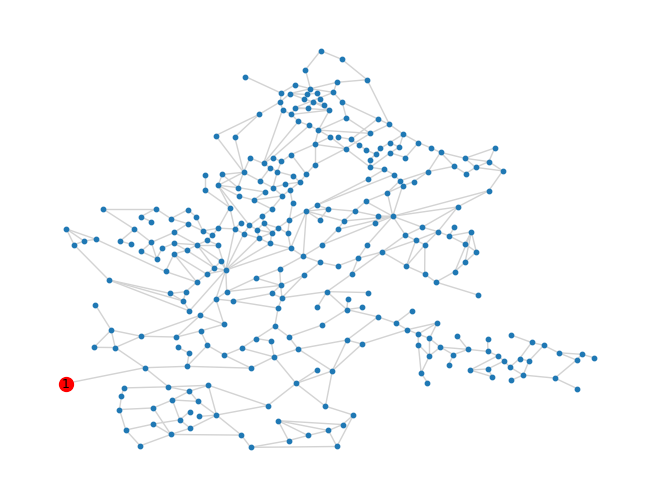

In [7]:
pos = {
    n: (float(data['x']), float(data['y'])) for n, data in G.nodes(data=True)
}

plt.ion()

time = 20000

draw(model, pos)
for i in range(time):
    model.step()
    result = model.anyone_moved
    if result:
        print(f"\nTempo: {i}\n")
        draw(model, pos)

plt.ioff()
plt.show()